In [11]:
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
#Data downloaded from https://neurodata.io/project/connectomes/

In [3]:
fname='/home/maria/Downloads/c.elegans.herm_pharynx_1.graphml'
graph=nx.read_graphml(fname)

In [4]:
def parse_graph(graph):
    adj_lst={}
    for line in nx.generate_adjlist(graph):
        strp_n=line.replace("n", "")
        lst=strp_n.split(' ')
        int_lst=[]
        for ind in lst:
            int_lst.append(int(ind))
        adj_lst[int_lst[0]]=int_lst[1:]
    return adj_lst

In [5]:
adj_lst=parse_graph(graph)

In [20]:
def adj_lst_to_mat(adj_lst):
    n_nodes=len(adj_lst.keys())
    con_mat=np.zeros((n_nodes,n_nodes))
    for node in adj_lst.keys():
        for adj in adj_lst[node]:
            con_mat[node,adj]=1
    return con_mat

In [21]:
con_mat=adj_lst_to_mat(adj_lst)

# Run Monte Carlo simulation

In [62]:
np.random.seed(77)
def simulation(adj_lst,con_mat):
    iterations=1000
    initial_condition=random.choice(list(adj_lst.keys()))
    prev=initial_condition
    adj_lst_reachable=clean_graph(adj_lst,con_mat,initial_condition)
    visited_nodes=[]
    for it in range(iterations):
        visited_nodes.append(prev)
        move_to=random.choice(adj_lst_reachable[prev])
        prev=move_to
    return visited_nodes

In [63]:
visited_nodes=simulation(adj_lst,con_mat)

Text(0, 0.5, 'Nr of times visited on path')

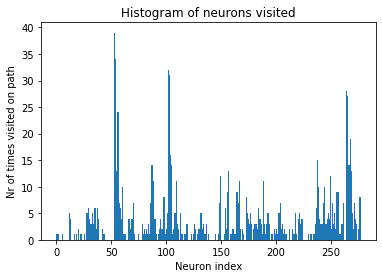

In [66]:
plt.hist(visited_nodes,bins=278)
plt.title('Histogram of neurons visited')
plt.xlabel('Neuron index')
plt.ylabel('Nr of times visited on path')